# LAB7: Text Summarization with Transformers

In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


In [2]:
cnn_test_DF = pd.read_csv('contents/cnn_dailymail/test.csv')

cnn_test_DF.head()

art_lengths = [len(art) for art in cnn_test_DF['article']]
summary_lengths = [len(high) for high in cnn_test_DF['highlights']]

mean_articles_len = np.mean(art_lengths)
mean_summary_len = np.mean(summary_lengths)

median_article_len = np.median(art_lengths)
median_summary_len = np.median(summary_lengths)

max_article_len = max(art_lengths)
min_article_len = min(art_lengths)

max_summary_len = max(summary_lengths)
min_summary_len = min(summary_lengths)




print("Statistics of the article in test.  \n MEAN LENGTH: ", round(mean_articles_len,2),"\n MEDIAN LENGTH: ", median_article_len, "\n MAX LENGTH: ", max_article_len, "\n MIN LENGHT: ", min_article_len, "\n")
print("Statistics of the summary  in test: \n MEAN LENGTH: ", round(mean_summary_len, 2),"\n MEDIAN LENGTH: ", median_summary_len, "\n MAX LENGTH: ", max_summary_len, "\n MIN LENGHT: ", min_summary_len)

Statistics of the article in test.  
 MEAN LENGTH:  3967.08 
 MEDIAN LENGTH:  3563.0 
 MAX LENGTH:  11991 
 MIN LENGHT:  293 

Statistics of the summary  in test: 
 MEAN LENGTH:  311.93 
 MEDIAN LENGTH:  290.0 
 MAX LENGTH:  3410 
 MIN LENGHT:  51


In [3]:
cnn_test_DF.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


In [13]:
cnn_train_DF = pd.read_csv('contents/cnn_dailymail/test.csv')

cnn_train_DF.head()

art_lengths = [len(art) for art in cnn_train_DF['article']]
summary_lengths = [len(high) for high in cnn_train_DF['highlights']]

mean_articles_len = np.mean(art_lengths)
mean_summary_len = np.mean(summary_lengths)

median_article_len = np.median(art_lengths)
median_summary_len = np.median(summary_lengths)

max_article_len = max(art_lengths)
min_article_len = min(art_lengths)

max_summary_len = max(summary_lengths)
min_summary_len = min(summary_lengths)




print("Statistics of the article in train.  \n MEAN LENGTH: ", round(mean_articles_len,2),"\n MEDIAN LENGTH: ", median_article_len, "\n MAX LENGTH: ", max_article_len, "\n MIN LENGHT: ", min_article_len, "\n")
print("Statistics of the summary  in train: \n MEAN LENGTH: ", round(mean_summary_len, 2),"\n MEDIAN LENGTH: ", median_summary_len, "\n MAX LENGTH: ", max_summary_len, "\n MIN LENGHT: ", min_summary_len)

Statistics of the article in train.  
 MEAN LENGTH:  3967.08 
 MEDIAN LENGTH:  3563.0 
 MAX LENGTH:  11991 
 MIN LENGHT:  293 

Statistics of the summary  in train: 
 MEAN LENGTH:  311.93 
 MEDIAN LENGTH:  290.0 
 MAX LENGTH:  3410 
 MIN LENGHT:  51


In [14]:
cnn_train_DF.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


In [15]:
articles_words = [word for art in cnn_train_DF['article'] for word in nltk.word_tokenize(art)]

print(len(articles_words))

8884364


In [18]:
summary_words = [word for summary in cnn_train_DF['highlights'] for word in nltk.word_tokenize(summary)]

print(len(summary_words))

663604


In [19]:
from nltk.probability import FreqDist

freq_dist = FreqDist(articles_words)
freq_dist

FreqDist({'the': 389708, '.': 374759, ',': 341883, 'to': 212826, 'a': 183212, 'and': 179344, 'of': 172932, 'in': 152937, 'was': 77969, "'": 75596, ...})

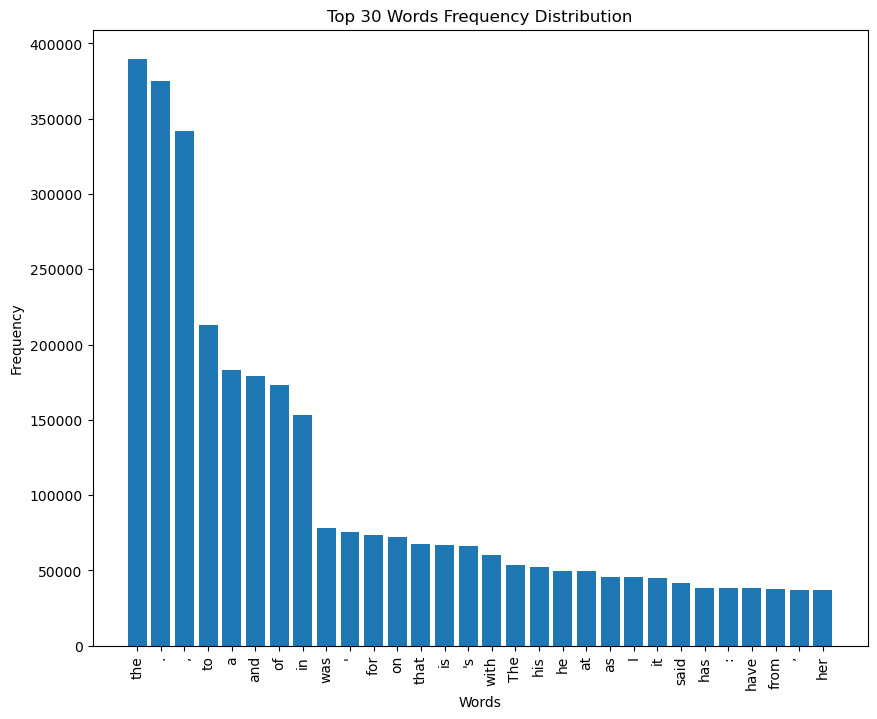

In [20]:
top_30 = freq_dist.most_common(30)

words, frequencies = zip(*top_30)
plt.figure(figsize=(10, 8))
plt.bar(words, frequencies)
plt.xticks(rotation=90)  # Rotate the word labels for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words Frequency Distribution')
plt.show()

In [21]:
from nltk.probability import FreqDist

freq_dist_summary = FreqDist(articles_words)
freq_dist_summary

FreqDist({'the': 389708, '.': 374759, ',': 341883, 'to': 212826, 'a': 183212, 'and': 179344, 'of': 172932, 'in': 152937, 'was': 77969, "'": 75596, ...})

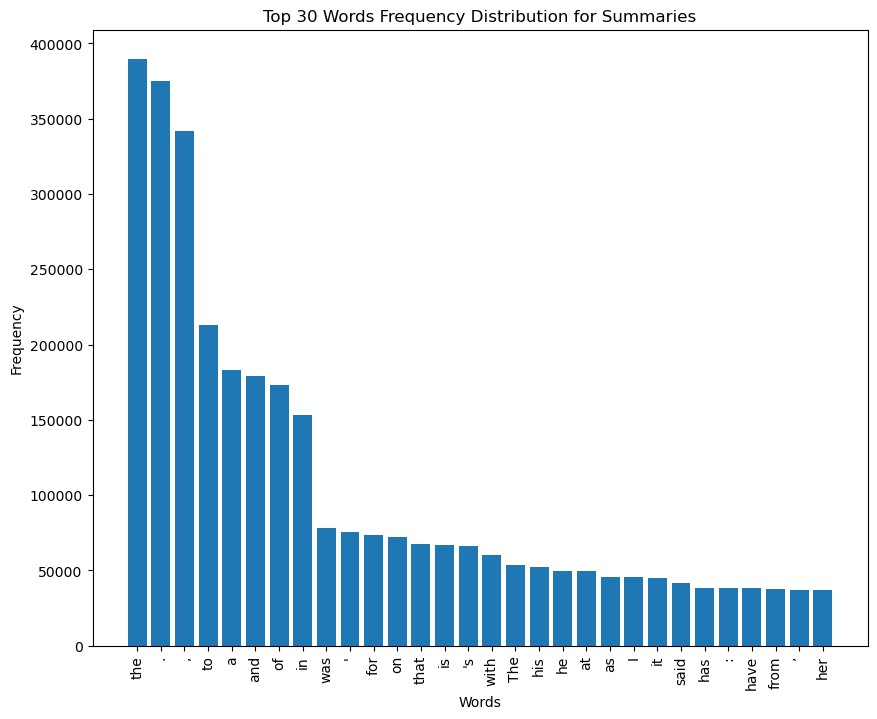

In [22]:
top_30 = freq_dist_summary.most_common(30)

words, frequencies = zip(*top_30)
plt.figure(figsize=(10, 8))
plt.bar(words, frequencies)
plt.xticks(rotation=90)  # Rotate the word labels for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words Frequency Distribution for Summaries')
plt.show()

### Reduce the dataset to include
• 9,000 instances in train

• 5,000 instances in validation

• 5,000 instances in test

In [26]:
cnn_train_DF = pd.read_csv('contents/cnn_dailymail/train.csv')
cnn_test_DF = pd.read_csv('contents/cnn_dailymail/test.csv')
cnn_validation_DF = pd.read_csv('contents/cnn_dailymail/validation.csv')

In [27]:
summaries_train = [nltk.word_tokenize(summary) for summary in cnn_train_DF['highlights']][9000]
articles_train = [nltk.word_tokenize(art) for art in cnn_train_DF['article']][9000]

summaries_test = [nltk.word_tokenize(summary) for summary in cnn_test_DF['highlights']][5000]
articles_test = [nltk.word_tokenize(art) for art in cnn_test_DF['article']][9000]

summaries_validation = [nltk.word_tokenize(summary) for summary in cnn_validation_DF['highlights']][9000]
articles_validation = [nltk.word_tokenize(art) for art in cnn_validation_DF['article']][9000]

In [28]:
cnn_train_DF.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
